In [5]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install umap-learn

  Created wheel for umap-learn: filename=umap_learn-0.4.6-py3-none-any.whl size=67957 sha256=184d93ba904976fc24d054c4d95467e109e5b5c2c4155ad6607c7ba90f6479a6
  Stored in directory: c:\users\miguel\appdata\local\pip\cache\wheels\9c\18\d0\2bcf7df75d19c6ca6ff8097b12abd4c46879e9a8275e93e651
Successfully built umap-learn
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install umap

  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3570 sha256=a57d87d392d5462339d4470e7c3b36b0e110ad440765eef5709e157c2fcf5253
  Stored in directory: c:\users\miguel\appdata\local\pip\cache\wheels\d4\13\91\2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install datashader

  Created wheel for datashape: filename=datashape-0.5.2-py3-none-any.whl size=59448 sha256=6265b626df01f72b0589b31e37bf4bafe1bab01a0ae802c3da4ee23edea0a698
  Stored in directory: c:\users\miguel\appdata\local\pip\cache\wheels\6d\79\c4\c425774559165f472d32e5ef592ff9a71179abb31f05dbc98b
Successfully built datashape
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bokeh

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install holoviews

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install colorcet

Note: you may need to restart the kernel to use updated packages.


# Introduction

Una de las aplicaciones más importantes del procesamiento del lenguaje natural es la posibilidad de clasificar documentos de forma automática según unas categorías previamente definidas. Entre sus múltiples utilidades prácticas se encuentra, por ejemplo, la categorización de correos electrónicos, noticias, u otros textos, de modo que las comunicaciones con los clientes puedan gestionarse de una forma más eficaz, rápida y precisa. 
Sin embargo, estas categorías no siempre vienen predefinidas de antemano. Con frecuencia, uno de los primeros retos con los que nos encontramos al afrontar este tipo de proyectos es la necesidad de identificar las categorías latentes en los datos.
Durante esta sesión, se presentará un ejercicio de clusterización, en dónde el objetivo será la de identificar las categorías potenciales en un conjunto de noticias que se facilitará. 

## Objectives

Durante el ejercicio, tratar de responder a las siguientes preguntas: 
* Categorías relevantes. 
* Número de categorías óptimo.
* Asignación de una etiqueta identificativa de cada categoría.

# Imports

In [1]:
# Data Analysis
import pandas as pd
import numpy as np
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import yellowbrick
import umap.plot
from yellowbrick.text import UMAPVisualizer
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

# Text Visualization
from PIL import Image
from os import path
import os
import random
from wordcloud import WordCloud, STOPWORDS

# Text Processing
import re
import itertools
import spacy
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm
from collections import Counter

# Dimensionality reduction and embedding
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import umap

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.cluster as cluster

# Fix imbalance
from imblearn.under_sampling import InstanceHardnessThreshold

# Model training and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score
import  statsmodels.formula.api as sm

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier

# Ignore noise warning
import warnings
warnings.filterwarnings('ignore')

# Work with pickles and sparse matrix
import pickle as pkl
from scipy import sparse
from numpy import asarray
from numpy import savetxt

pd.set_option('display.max_column', None)

# 1. Exploratory Data Analysis

## Read data

In [2]:
URL_data = 'https://raw.githubusercontent.com/jjcerromar/Talent_BS_2020/main/Talent2020_TopicDiscovery_Dataset.csv'
df_data = pd.read_csv(URL_data)
df_data.drop(["Unnamed: 0"], axis=1, inplace=True)
df_data.to_csv('../data/input/Talent2020_TopicDiscovery_Dataset.csv')

## EDA

In [3]:
df_data.head()

,headline,authors,link,short_description,date
0,"Donald Trump Is Slipping Among Union Voters, S...",Dave Jamieson,https://www.huffingtonpost.com/entry/trump-sli...,"The labor federation insists the ""union worker...",2016-09-08
1,Jewish Centers Across The Country Are Being Ta...,Andy Campbell and Willa Frej,https://www.huffingtonpost.com/entry/jewish-ce...,They received at least 20 threats on Wednesday.,2017-01-18
2,Man Who Faced 20 Years For Marijuana Possessio...,Nick Wing,https://www.huffingtonpost.com/entry/corey-lad...,Corey Ladd's harsh sentence for a half-ounce o...,2017-06-13
3,'ISIS Truther' Donald Trump Is Like A Lawyer's...,Ron Dicker,https://www.huffingtonpost.com/entry/isis-trut...,He just doesn't get it.,2016-08-12
4,Cruz Sees Opportunity In GOP Opposition To His...,NaN,https://www.huffingtonpost.comhttp://www.realc...,Ted Cruz has made his mark in the Senate by ma...,2016-01-22


### Check shape

In [4]:
df_data.shape

(8000, 5)

### Check dtypes and columns

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   headline           8000 non-null   object
 1   authors            6416 non-null   object
 2   link               8000 non-null   object
 3   short_description  6737 non-null   object
 4   date               8000 non-null   object
dtypes: object(5)
memory usage: 312.6+ KB


### Check nulls and duplicates

In [6]:
df_data.isna().sum()

headline                0
authors              1584
link                    0
short_description    1263
date                    0
dtype: int64

In [7]:
df_data.fillna("other", inplace=True)
df_data.isna().sum()

headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [8]:
df_data.duplicated().sum()

0

### Check uniques

In [9]:
df_data.nunique()

headline             7988
authors              1586
link                 7999
short_description    6713
date                 1699
dtype: int64

As I don't have any variable with few uniques to use as a target variable, I have to generate them or look for them in case the dataset is in an open repo.
I found larger dataset cointaining the info I need so will merge them based on the dataset prepared for this challenge.

In [10]:
df_origin = pd.read_csv("../data/input/News_Category_Dataset_v2.csv")
df_origin.drop(["Unnamed: 0"], axis=1, inplace=True)
df_origin.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [11]:
df_origin.shape

(200853, 6)

In [12]:
df_data2 = pd.merge(left=df_data, right=df_origin, how="inner", on="short_description")
to_drop = ['headline_y', 'authors_y', 'link_y', 'date_y']
df_data2.drop(to_drop, axis=1, inplace=True)
df_data2 = df_data2[0:8001]
df_data2.to_csv('../data/input/Talent2020_TopicDiscovery_Dataset2.csv')
df_data2.head()

,headline_x,authors_x,link_x,short_description,date_x,category
0,"Donald Trump Is Slipping Among Union Voters, S...",Dave Jamieson,https://www.huffingtonpost.com/entry/trump-sli...,"The labor federation insists the ""union worker...",2016-09-08,POLITICS
1,Jewish Centers Across The Country Are Being Ta...,Andy Campbell and Willa Frej,https://www.huffingtonpost.com/entry/jewish-ce...,They received at least 20 threats on Wednesday.,2017-01-18,POLITICS
2,Man Who Faced 20 Years For Marijuana Possessio...,Nick Wing,https://www.huffingtonpost.com/entry/corey-lad...,Corey Ladd's harsh sentence for a half-ounce o...,2017-06-13,POLITICS
3,'ISIS Truther' Donald Trump Is Like A Lawyer's...,Ron Dicker,https://www.huffingtonpost.com/entry/isis-trut...,He just doesn't get it.,2016-08-12,POLITICS
4,Cruz Sees Opportunity In GOP Opposition To His...,other,https://www.huffingtonpost.comhttp://www.realc...,Ted Cruz has made his mark in the Senate by ma...,2016-01-22,POLITICS


In [13]:
df_data2.shape

(8001, 6)

In [14]:
df_data2.isna().sum()

headline_x           0
authors_x            0
link_x               0
short_description    0
date_x               0
category             0
dtype: int64

### Check target variable (category) distribution

In [15]:
df_data2.category.value_counts()

POLITICS          4042
SPORTS            1739
SCIENCE           1653
CRIME              429
ENTERTAINMENT       35
COMEDY              15
PARENTS             14
STYLE               13
QUEER VOICES        11
MEDIA                8
WEIRD NEWS           6
TECH                 6
STYLE & BEAUTY       5
ARTS & CULTURE       3
BUSINESS             3
FOOD & DRINK         3
GOOD NEWS            3
TRAVEL               3
HEALTHY LIVING       2
TASTE                2
WORLD NEWS           2
WOMEN                2
ENVIRONMENT          1
THE WORLDPOST        1
Name: category, dtype: int64

### Target variable distribution visualization

I will use countplots to visualize most frequent types.

FileNotFoundError: [Errno 2] No such file or directory: '../images/output_images/categories.png'

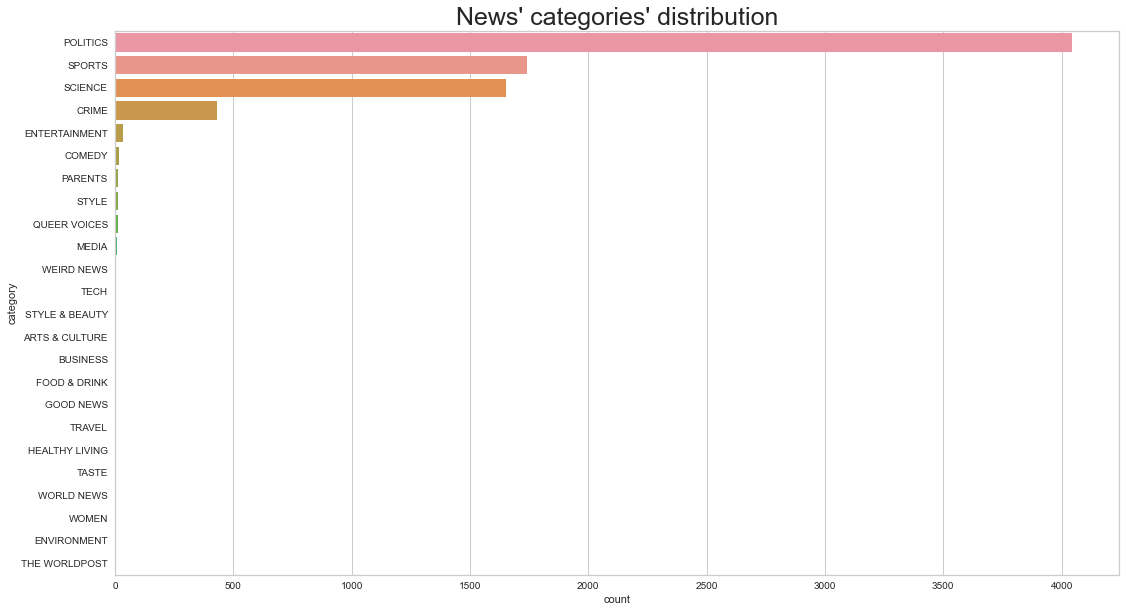

In [16]:
plt.figure(figsize=(18,10))
sns.countplot(y='category',data=df_data2, order=df_data2.category.value_counts().index)
sns.set_context('talk')
plt.title("News' categories' distribution", fontsize=25)
plt.savefig('../images/output_images/categories.png')
plt.show()

**It seems there's huge difference between categories' distribution. Most of them fall between just 4 categories.**

I also want to see how long descriptions are for each category of new

In [17]:
def var_row(row):
    lst = []
    for word in row.split('|||'):
        lst.append(len(word.split()))
    return np.var(lst)

df_data2['words_per_comment'] = df_data2['short_description'].apply(lambda x: len(x.split())/50)
df_data2['variance_of_word_counts'] = df_data2['short_description'].apply(lambda x: var_row(x))

KeyboardInterrupt: 

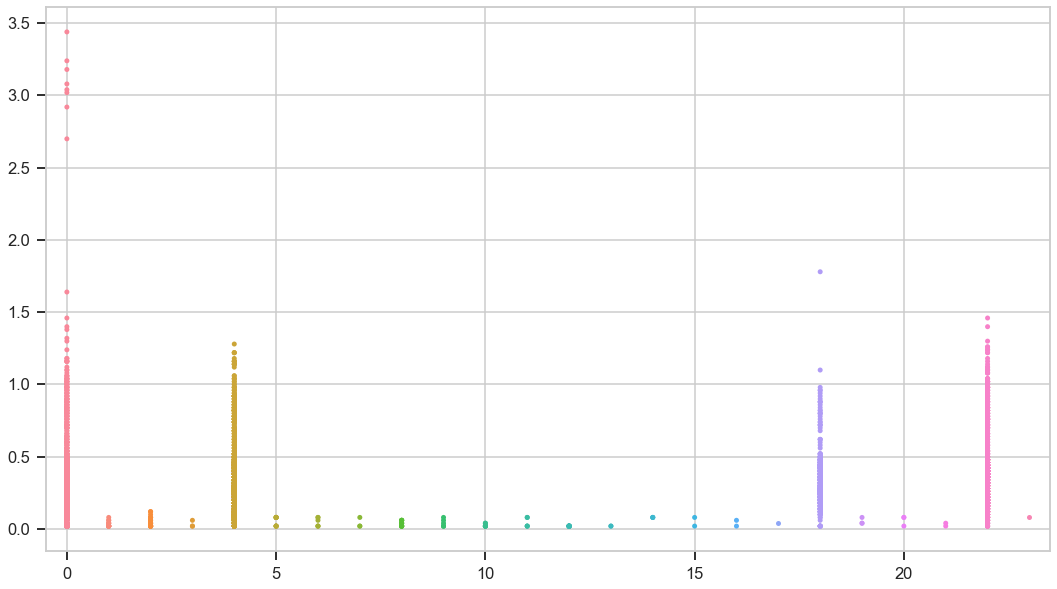

In [21]:
plt.figure(figsize=(18,10))
sns.swarmplot('category', 'words_per_comment', data=df_data2)
sns.set_context('talk')
plt.title('Description length per category', fontsize=25)
plt.savefig('../images/output_images/description_length.png')
plt.show()

### Let's see some metrics' statistics

In [18]:
df_data2.describe()

,words_per_comment,variance_of_word_counts
count,8001.000000,8001.0
mean,0.350364,0.0
std,0.209225,0.0
min,0.020000,0.0
25%,0.220000,0.0
50%,0.380000,0.0
75%,0.380000,0.0
max,3.440000,0.0


### Lets make wordclouds of the most common words in the descriptions after tokenizing them with spacy

#### Bag of Words

In [30]:
df_data2_text = df_data2[['category', 'short_description']].copy()

In [31]:
df_data2_text = df_data2_text.fillna('')
text_columns = df_data2_text[['category']]
text_columns['short_description'] = df_data2_text.iloc[:,1:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [ ]:
#!pip install -U pip setuptools wheel

In [ ]:
#!pip install -U spacy

In [33]:
#!python -m spacy download en_core_web_sm


    Error: Couldn't link model to 'en_core_web_sm'
    Creating a symlink in spacy/data failed. Make sure you have the required
    permissions and try re-running the command as admin, or use a
    virtualenv. You can still import the model as a module and call its
    load() method, or create the symlink manually.

    C:\Users\usuario9\.conda\envs\python37-env\lib\site-packages\en_core_web_sm
    -->
    C:\Users\usuario9\.conda\envs\python37-env\lib\site-packages\spacy\data\en_core_web_sm


    Creating a shortcut link for 'en' didn't work (maybe you don't have
    admin permissions?), but you can still load the model via its full
    package name: nlp = spacy.load('{name}')
    Download successful but linking failed



**Dado que tengo problemas con spacy voy a dejar el código aunque no pueda devolver los resultados***

In [38]:
#nlp = en_core_web_sm.load()
nlp = spacy.load(en_core_web_sm)
nlp.max_length = 33000000

OSError: [E050] Can't find model '<module 'en_core_web_sm' from 'C:\\Users\\usuario9\\.conda\\envs\\python37-env\\lib\\site-packages\\en_core_web_sm\\__init__.py'>'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [34]:
def tokenize(string):
    '''
    This function takes a sentence and returns the list of all lemma
    '''
    doc = nlp(string)
    l_token = [token.text for token in doc if not token.is_punct 
               | token.is_space | token.is_stop | token.is_digit & token.is_oov]
    return ' '.join(l_token)


text_columns['short_description'] = text_columns['short_description'].apply(lambda row: tokenize(row))

NameError: name 'nlp' is not defined

In [ ]:
pd_token = pd.DataFrame(text_columns, columns=['category', 'short_description'])
pd_token.head()

In [ ]:
pd_token.to_pickle('../data/output/tokens.pkl')

In [ ]:
# Read the whole text.
text = ' '.join(pd_token['short_description'])

# Generate a word cloud image
stopwords = STOPWORDS
wordcloud = WordCloud(background_color='white', width=800, height=400, stopwords=stopwords, max_words=100, repeat=False, min_word_length=4).generate(text)

# Display the generated image:
plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
sns.set_context('talk')
plt.title('Most common tokenized words', fontsize=25)
plt.savefig('../images/output_images/description_length.png)
plt.show()